#Nivell 1
### 1.
Importa com un DataFrame l'arxiu sprint10.xlsx. Assegura't que el fitxer s'importa correctament, amb els noms de columnes que li corresponen, sense manipular l'arxiu original.

Ordena el DataFrame pel país d'origen. En cas d'empat, ordena pel nom de la ciutat.

Mostra les primeres 10 files.

Addicionalment, fes un print on comprovi que el DNI només té valors únics.

In [15]:
import pandas as pd
import os

#creem funció per importar i convertir un firxer excel
def importar_y_convertir_Excel(nom_arxiu, fila_index, fila_cabezera):
    ruta = os.path.abspath(nom_arxiu)
    datos = pd.read_excel(ruta, header=fila_cabezera, index_col=fila_index)
    dataFrame = pd.DataFrame(datos)
    return dataFrame



In [16]:
import numpy as np
fitxer = 'sprint10.xlsx'
index = 0
capçalera = 3
sprint =  importar_y_convertir_Excel(fitxer,index,capçalera)
sprint['Fills'] = np.where(sprint['No Fills']== 1.0, sprint['Fills'] == 0, 1 )
sprint['No Fills'] = np.where(sprint['Fills']== 1.0, sprint['No Fills'] == 0, 1 )
sprint_resultado = sprint[(sprint['Fills'] == 1.0) & (sprint['No Fills'] == 1.0) | (sprint['Fills'] == 0) & (sprint['No Fills'] == 0)  | (sprint['Fills'] == 1) & (sprint['No Fills'] == 1) ]
sprint_resultado
sprint.sort_values(by=["País d'origen", "Ciutat"]).head(10)

,Nom,Cognoms,DNI,País d'origen,Ciutat,Dia de Naixement,Mes de Naixement,Any de Naixement,Gènere,Salari mensual,Fills,No Fills,Grup Professional
21,Mia,Schneider Fischer,28973553Z,Alemanya,Berlín,22,10,1976,A,951 €,0,1,Grup A
154,Laura,Schneider Fischer,37399141L,Alemanya,Berlín,2,2,1958,D,1.769 €,1,0,Grup B
224,Lea,Schneider Schneider,37368317L,Alemanya,Berlín,23,10,2005,D,2.013 €,0,1,Grup B
278,Mia,Fischer,21390098Z,Alemanya,Berlín,11,8,1950,D,1.557 €,1,0,Grup B
602,Jonas,Schneider,44060014R,Alemanya,Berlín,22,11,1985,H,2.754 €,1,0,Grup D
871,Lea,Fischer,14773153R,Alemanya,Berlín,9,9,1986,D,1.370 €,1,0,Grup A
281,Lea,Müller,23266650S,Alemanya,Hamburg,14,4,2003,D,1.314 €,0,1,Grup A
435,Anna,Müller,83274277X,Alemanya,Hamburg,1,1,1987,D,2.464 €,0,1,Grup C
444,Laura,Schmidt Müller,60161784X,Alemanya,Hamburg,15,6,1987,NC,2.035 €,1,0,Grup C
487,Lukas,Müller Fischer,60982309S,Alemanya,Hamburg,28,3,1971,H,2.042 €,0,1,Grup B


In [17]:

#sprint.loc[sprint.duplicated(subset='DNI') == True]

if sprint['DNI'].duplicated().any() == True:
    print(f"Hi ha valors repetits {sprint['DNI']}")
else:
    print("No hi ha valors duplicats")

No hi ha valors duplicats


### 2.
Crea una columna que sigui el nom complet.

Crea una columna si la persona és nascuda a Espanya o no.

Posa el DNI com a índex del DataFrame (noms de files).

Substitueix el nom de les columnes Dia de Naixement, Mes de Naixement i Any de Naixement per Dia, Mes i Any.

Substitueix H per Home, D per Dona, A per Altres i NC per una dada faltant (nan/null/na).

Mostra tots els canvis que has realitzat en una sola taula.

In [18]:
sprint['Nom_complet'] = sprint['Nom']+" "+sprint['Cognoms']
sprint['Nascut_a_Espanya'] = np.where(sprint['País d\'origen'] == 'Espanya', True , False)
#fer index del DNI
sprint.set_index('DNI', inplace=True)

sprint.rename(columns={"Dia de Naixement": "Dia", "Mes de Naixement": 'Mes', "Any de Naixement": "Any"}, inplace= True)
sprint.loc[sprint['Gènere'] == 'H', 'Gènere'] = 'Home'
sprint.loc[sprint['Gènere'] == 'D', 'Gènere'] = 'Dona'
sprint.loc[sprint['Gènere'] == 'A', 'Gènere'] = 'Altres'
sprint.loc[sprint['Gènere'] == 'NC', 'Gènere'] = 'NaN'
#mostrar nomes les columnes noves que s'han creat
display(sprint[['Nom_complet','Nascut_a_Espanya','Dia','Mes','Any','Gènere']])


,Nom_complet,Nascut_a_Espanya,Dia,Mes,Any,Gènere
DNI,,,,,,
16928694K,Inês Ferreira Silva,False,25,2,1953,Dona
27724652S,Clara Sánchez Martínez,True,18,3,1996,Dona
38141675A,Fatima Fassi,False,6,11,2005,Altres
59157262R,Khadija Bennani Bennani,False,20,1,1995,Dona
69630528M,Toni Sánchez García,True,9,8,1999,Home
...,...,...,...,...,...,...
25161375F,Marta Ferrer Ferrer,True,1,6,1951,Dona
52145541P,Joan García,True,11,4,1959,Home
69760120X,Laia Ferrer Martínez,True,11,11,1980,Dona


### 3.
Junta les columnes Fills i No Fills en una sola columna, utilitzant el mètode .apply() i definint una funció que resolgui el problema. La columna nova ha de dir-se "Fills" i prendre els valors "Sí" o "No".

In [19]:
def fills(x):
    if x == 1:
        x= 'Sí'
        return x
    elif x == 0:
        x = 'No'
        return x
    else:
        return x

sprint['Fills_o_no'] = sprint['Fills'].apply(fills)
sprint


,Nom,Cognoms,País d'origen,Ciutat,Dia,Mes,Any,Gènere,Salari mensual,Fills,No Fills,Grup Professional,Nom_complet,Nascut_a_Espanya,Fills_o_no
DNI,,,,,,,,,,,,,,,
16928694K,Inês,Ferreira Silva,Portugal,Lisboa,25,2,1953,Dona,1.144 €,0,1,Grup B,Inês Ferreira Silva,False,No
27724652S,Clara,Sánchez Martínez,Espanya,Barcelona,18,3,1996,Dona,1.253 €,1,0,Grup A,Clara Sánchez Martínez,True,Sí
38141675A,Fatima,Fassi,Marroc,Rabat,6,11,2005,Altres,1.441 €,1,0,Grup A,Fatima Fassi,False,Sí
59157262R,Khadija,Bennani Bennani,Marroc,Rabat,20,1,1995,Dona,1.944 €,0,1,Grup B,Khadija Bennani Bennani,False,No
69630528M,Toni,Sánchez García,Espanya,Barcelona,9,8,1999,Home,1.043 €,0,1,Grup A,Toni Sánchez García,True,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25161375F,Marta,Ferrer Ferrer,Espanya,Sevilla,1,6,1951,Dona,1.216 €,0,1,Grup B,Marta Ferrer Ferrer,True,No
52145541P,Joan,García,Espanya,Sevilla,11,4,1959,Home,971 €,0,1,Grup A,Joan García,True,No
69760120X,Laia,Ferrer Martínez,Espanya,Barcelona,11,11,1980,Dona,682 €,0,1,Grup A,Laia Ferrer Martínez,True,No


###4.
Crea una taula resum que permeti veure el sou mig, medià, mínim i màxim per Gènere.

Ordena la taula en funció del sou mig.

In [20]:
#treure simbols per poder modificar tipus de object a float
sprint['Salari mensual'] = (sprint['Salari mensual'].str.replace(r'[€.]',"",regex=True))
sprint['Salari mensual']=sprint['Salari mensual'].astype(float)
sprint  

,Nom,Cognoms,País d'origen,Ciutat,Dia,Mes,Any,Gènere,Salari mensual,Fills,No Fills,Grup Professional,Nom_complet,Nascut_a_Espanya,Fills_o_no
DNI,,,,,,,,,,,,,,,
16928694K,Inês,Ferreira Silva,Portugal,Lisboa,25,2,1953,Dona,1144.0,0,1,Grup B,Inês Ferreira Silva,False,No
27724652S,Clara,Sánchez Martínez,Espanya,Barcelona,18,3,1996,Dona,1253.0,1,0,Grup A,Clara Sánchez Martínez,True,Sí
38141675A,Fatima,Fassi,Marroc,Rabat,6,11,2005,Altres,1441.0,1,0,Grup A,Fatima Fassi,False,Sí
59157262R,Khadija,Bennani Bennani,Marroc,Rabat,20,1,1995,Dona,1944.0,0,1,Grup B,Khadija Bennani Bennani,False,No
69630528M,Toni,Sánchez García,Espanya,Barcelona,9,8,1999,Home,1043.0,0,1,Grup A,Toni Sánchez García,True,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25161375F,Marta,Ferrer Ferrer,Espanya,Sevilla,1,6,1951,Dona,1216.0,0,1,Grup B,Marta Ferrer Ferrer,True,No
52145541P,Joan,García,Espanya,Sevilla,11,4,1959,Home,971.0,0,1,Grup A,Joan García,True,No
69760120X,Laia,Ferrer Martínez,Espanya,Barcelona,11,11,1980,Dona,682.0,0,1,Grup A,Laia Ferrer Martínez,True,No


In [21]:
#sprint.groupby('Gènere')['Salari mensual'].agg(['max','min','mean','median'])
sprint.groupby('Gènere').agg(
    Maxim = ('Salari mensual', 'max'),
    Minim = ('Salari mensual', 'min'),
    Media = ('Salari mensual', 'median'),
    Mitja = ('Salari mensual', 'mean')).sort_values(by='Mitja',ascending=False).round(2)    


,Maxim,Minim,Media,Mitja
Gènere,,,,
Home,3356.0,737.0,1531.0,1643.25
Altres,3175.0,703.0,1545.0,1626.59
NaN,2969.0,758.0,1443.0,1568.87
Dona,3021.0,665.0,1361.5,1469.44


### 5.
Crea una taula resum amb el salari mig per gènere (files) i país d'origen (columnes).

Afegeix-hi les mitjanes als marges de la taula.

(EXTRA): Aplica format condicional a la taula per veure en un color més intens els valors més elevats

In [ ]:
tabla_resumen =sprint.pivot_table(index='Gènere', columns='País d\'origen', values='Salari mensual', margins=True, margins_name="TOTAL").round(2)

def categoria_color(x):   
    if np.isnan(x):
        return 'color: red'
    if x >= 2000:
        return 'background-color: green'
    elif x >= 1500 and x<2000:
        return 'background-color: orange'
    else:
        return 'background-color: red'
    

tabla_resumen.style.map(categoria_color)\
.format("{:.2f}€")

País d'origen,Alemanya,Argentina,Colòmbia,Espanya,França,Itàlia,Marroc,Mèxic,Portugal,Regne Unit,TOTAL
Gènere,,,,,,,,,,,
Altres,951.00€,1141.00€,1030.00€,1706.18€,nan€,1423.00€,1365.00€,1372.00€,1765.00€,1921.00€,1626.59€
Dona,1804.31€,1291.80€,1497.75€,1460.16€,1566.47€,1247.18€,1405.21€,1517.80€,1488.55€,1489.46€,1469.44€
Home,2067.43€,1583.29€,1554.67€,1682.11€,1389.25€,1672.88€,1531.00€,1625.00€,1497.00€,1162.56€,1643.25€
NaN,1931.50€,1135.67€,1252.00€,1597.14€,1573.00€,1316.00€,1365.50€,1583.00€,1553.50€,1758.00€,1568.87€
TOTAL,1858.35€,1431.68€,1489.13€,1582.16€,1465.36€,1421.17€,1441.69€,1559.08€,1527.23€,1448.33€,1561.46€


### 6.
Crea una columna nova que sigui la data de naixament en format Datetime a partir de les columnes dia, mes i any. Utilitzant aquesta columna crea una funció que donada una data, et calculi l'edat actual a dia d'avui.

Utilitza la funció que acabes de crear per generar una columna nova al DataFrame amb l'edat actual.

In [23]:
from datetime import datetime, date, time, timedelta

# concatenar las 3 columnas, pasandolas como stirng
sprint['Data_naixement'] = sprint['Dia'].astype(str) + '/' + sprint['Mes'].astype(str) + '/' + sprint['Any'].astype(str)
# cambiar formato a date time
sprint['Data_naixement'] = pd.to_datetime(sprint['Data_naixement'], format = '%d/%m/%Y', dayfirst=True)
#c modificar formato de fecha
#sprint['Data_naixement'] = sprint['Data_naixement'].strpdate('%d/%m/%Y')
def anys_avui(data):
    anys = date.today().year - data.year
    #condicio_mes = date.today().month < data.dt.month
    #condicio_dia = (date.today().month == data.dt.month) & (date.today().day < data.dt.day)
   #si el mes es mes petit a l'actual restar 1 any
    if date.today().month < data.month:
        anys+=-1
    elif date.today().month == data.month and date.today().day < data.day:
        anys+=-1
    return anys
sprint['Edat'] = sprint['Data_naixement'].apply(anys_avui)
sprint

,Nom,Cognoms,País d'origen,Ciutat,Dia,Mes,Any,Gènere,Salari mensual,Fills,No Fills,Grup Professional,Nom_complet,Nascut_a_Espanya,Fills_o_no,Data_naixement,Edat
DNI,,,,,,,,,,,,,,,,,
16928694K,Inês,Ferreira Silva,Portugal,Lisboa,25,2,1953,Dona,1144.0,0,1,Grup B,Inês Ferreira Silva,False,No,1953-02-25,72
27724652S,Clara,Sánchez Martínez,Espanya,Barcelona,18,3,1996,Dona,1253.0,1,0,Grup A,Clara Sánchez Martínez,True,Sí,1996-03-18,29
38141675A,Fatima,Fassi,Marroc,Rabat,6,11,2005,Altres,1441.0,1,0,Grup A,Fatima Fassi,False,Sí,2005-11-06,20
59157262R,Khadija,Bennani Bennani,Marroc,Rabat,20,1,1995,Dona,1944.0,0,1,Grup B,Khadija Bennani Bennani,False,No,1995-01-20,30
69630528M,Toni,Sánchez García,Espanya,Barcelona,9,8,1999,Home,1043.0,0,1,Grup A,Toni Sánchez García,True,No,1999-08-09,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25161375F,Marta,Ferrer Ferrer,Espanya,Sevilla,1,6,1951,Dona,1216.0,0,1,Grup B,Marta Ferrer Ferrer,True,No,1951-06-01,74
52145541P,Joan,García,Espanya,Sevilla,11,4,1959,Home,971.0,0,1,Grup A,Joan García,True,No,1959-04-11,66
69760120X,Laia,Ferrer Martínez,Espanya,Barcelona,11,11,1980,Dona,682.0,0,1,Grup A,Laia Ferrer Martínez,True,No,1980-11-11,45


# Nivell 2
### 1.
Utilitzant el següent DataFrame, adjunta la columna "Increment" al dataframe del nivell anterior.

Actualitza la columna salari en funció dels percentatges que s'adjunten. No modifiquis manualment els increments, escriu codi Python per fer les conversions necessàries.

df_increment = pd.DataFrame({"Grup":["Grup A","Grup B","Grup C", "Grup D" ] , "Increment":

["5%","3,5%","2%","8%"]})



In [24]:
df_increment = pd.DataFrame({"Grup":["Grup A","Grup B","Grup C", "Grup D" ] , 
                             "Increment": ["5%","3,5%","2%","8%"]})

In [25]:
# convertir grup en index per poder passara diccionari al mapejar
df_increment.set_index('Grup', inplace=True)
#netejar % i , i passar a float
df_increment['Increment'] = df_increment['Increment'].replace(r'[%]', "",regex=True).replace(r'[,]', ".",regex=True).astype(float)


In [26]:
#restaurar index com a columna i no com a index
sprint = sprint.reset_index()
#sprint_sin_indice

In [27]:
# generem DataFrame amb el merge entre els 2 DataFrame
sprint =pd.merge(sprint,df_increment, left_on='Grup Professional', right_on='Grup', how= 'left')


In [28]:
# Creem columna i generem càlcul per omplir-la
sprint['Salari_incrementat'] = sprint.apply(lambda x: x ['Salari mensual'] + (x['Salari mensual'] * (x ['Increment']/100)), axis=1)
#print['Incremento'] = merge['Salari mensual'] + (merge['Salari mensual'] * (merge['Increment']/100))
sprint

,DNI,Nom,Cognoms,País d'origen,Ciutat,Dia,Mes,Any,Gènere,Salari mensual,Fills,No Fills,Grup Professional,Nom_complet,Nascut_a_Espanya,Fills_o_no,Data_naixement,Edat,Increment,Salari_incrementat
0,16928694K,Inês,Ferreira Silva,Portugal,Lisboa,25,2,1953,Dona,1144.0,0,1,Grup B,Inês Ferreira Silva,False,No,1953-02-25,72,3.5,1184.04
1,27724652S,Clara,Sánchez Martínez,Espanya,Barcelona,18,3,1996,Dona,1253.0,1,0,Grup A,Clara Sánchez Martínez,True,Sí,1996-03-18,29,5.0,1315.65
2,38141675A,Fatima,Fassi,Marroc,Rabat,6,11,2005,Altres,1441.0,1,0,Grup A,Fatima Fassi,False,Sí,2005-11-06,20,5.0,1513.05
3,59157262R,Khadija,Bennani Bennani,Marroc,Rabat,20,1,1995,Dona,1944.0,0,1,Grup B,Khadija Bennani Bennani,False,No,1995-01-20,30,3.5,2012.04
4,69630528M,Toni,Sánchez García,Espanya,Barcelona,9,8,1999,Home,1043.0,0,1,Grup A,Toni Sánchez García,True,No,1999-08-09,26,5.0,1095.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,25161375F,Marta,Ferrer Ferrer,Espanya,Sevilla,1,6,1951,Dona,1216.0,0,1,Grup B,Marta Ferrer Ferrer,True,No,1951-06-01,74,3.5,1258.56
996,52145541P,Joan,García,Espanya,Sevilla,11,4,1959,Home,971.0,0,1,Grup A,Joan García,True,No,1959-04-11,66,5.0,1019.55
997,69760120X,Laia,Ferrer Martínez,Espanya,Barcelona,11,11,1980,Dona,682.0,0,1,Grup A,Laia Ferrer Martínez,True,No,1980-11-11,45,5.0,716.10
998,82947791W,Jordi,García,Espanya,Barcelona,23,5,1984,Home,1699.0,1,0,Grup C,Jordi García,True,Sí,1984-05-23,41,2.0,1732.98


### 2.
Utilitzant un bucle, exporta en 4 fitxers (format .xlsx o .csv) les dades de cada Grup Professional.

Per exemple: "dades_GrupA.xlsx" , "dades_GrupB.xlsx" ...

Exporta un 5è DataFrame en format .xlsx o .csv que contingui quants treballadors hi ha per cada Grup Professional, quin és el seu sou mig i quina és la seva edat mediana.

In [ ]:
grupA = sprint[sprint['Grup Professional'] == 'Grup A']

In [30]:
sprint.pivot_table(index='Grup Professional' ,values=['DNI','Salari mensual', 'Edat'], aggfunc={'DNI': 'count', 'Salari mensual': 'mean', 'Edat': 'mean'})

,DNI,Edat,Salari mensual
Grup Professional,,,
Grup A,490,48.906122,1155.546939
Grup B,318,47.660377,1666.232704
Grup C,137,50.788321,2244.306569
Grup D,55,44.800000,2871.127273


In [31]:
for index, fila in sprint.iterrows():
    if fila["Grup Professional"] == "Grup A":
        sprint[sprint['Grup Professional'] == 'Grup A'].to_excel('dades_GrupA.xlsx')
    elif fila["Grup Professional"] == "Grup B":
        sprint[sprint['Grup Professional'] == 'Grup B'].to_excel('dades_GrupB.xlsx')
    elif fila["Grup Professional"] == "Grup C":
        sprint[sprint['Grup Professional'] == 'Grup C'].to_excel('dades_GrupC.xlsx')
    elif fila["Grup Professional"] == "Grup D":
        sprint[sprint['Grup Professional'] == 'Grup D'].to_excel('dades_GrupD.xlsx')
df_resum = sprint.pivot_table(index='Grup Professional',
                              values=['DNI','Salari mensual','Edat'], 
                              aggfunc={'DNI': 'count', 'Salari mensual': 'mean', 'Edat': 'mean'})
df_resum.to_excel('taula_resum.xlsx')





KeyboardInterrupt: 

# Nivell 3
El nivell 3 d’aquest sprint és totalment diferent a d’altres sprints que has fet fins ara, ja que són exercicis més abstractes que requereixen barallar-s’hi bastant. No continuen amb el mateix dataset dels nivells anteriors, sinó que et plantegen dues situacions noves totalment diferents entre elles.

1.
Crea una funció que prengui un dataframe com a paràmetre d'entrada.

La funció ha de crear (i exportar) un gràfic automàticament per a cada columna del dataframe. Per exemple:

un histograma/boxplot si la variable és numèrica
unes barres dels valors més freqüents si és categòrica
unes barres dels anys més freqüents si la dada està en format data.
La idea és crear una funció que funcioni per qualsevol dataframe, no només amb el que hem treballat fins ara.

Mostra el resultat de la funció en algun dels datasets d’exemple que conté el paquet seaborn. Per exemple, iris, penguins o titanic.

Tingues en consideració que en el següent sprint treballaràs exclusivament amb gràfics. L’objectiu d’aquest exercici no és crear gràfics molt elaborats, sinó resoldre una necessitat de manera ràpida i automàtica.



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_iris = sns.load_dataset('iris')
df_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


C:\Users\kytus\AppData\Local\Temp\ipykernel_19944\1849192051.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\kytus\AppData\Local\Temp\ipykernel_19944\1849192051.py:39: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


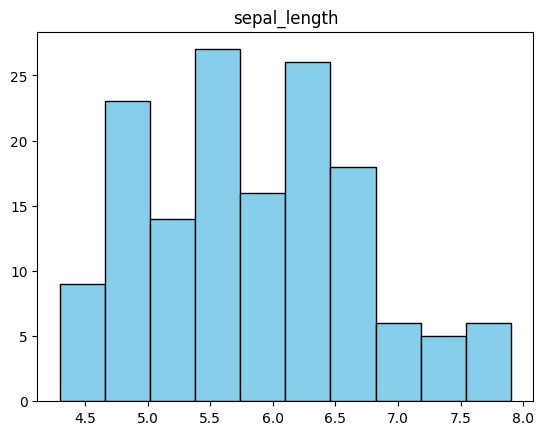

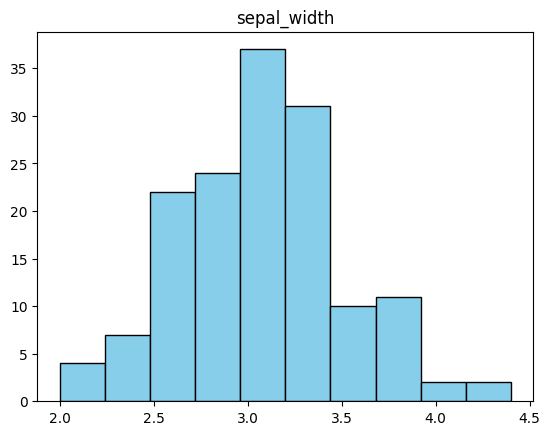

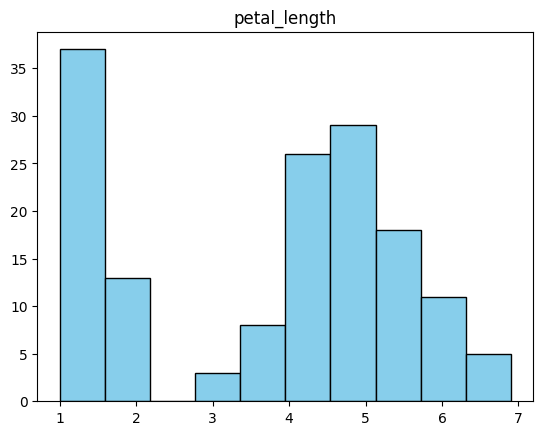

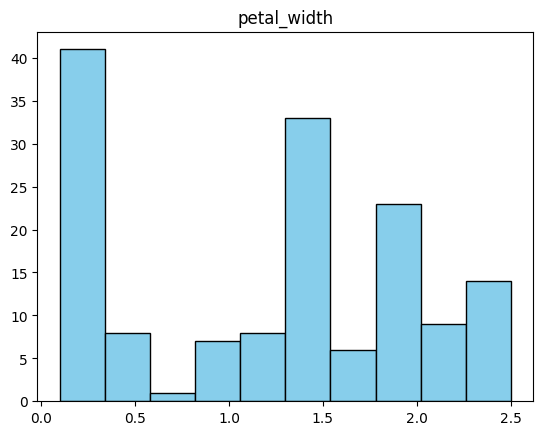

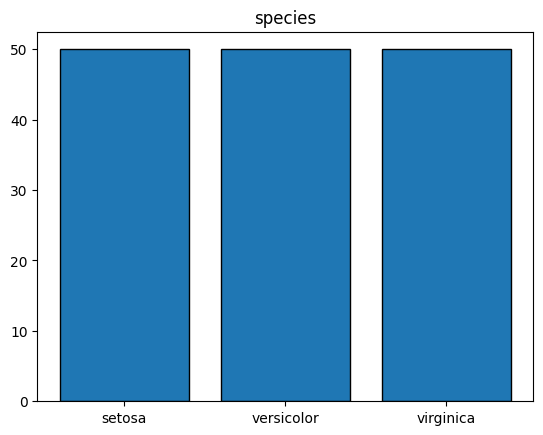

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

df_iris = sns.load_dataset('iris')
def exporta_grafic(df):
    filas = len(df)
    for columna in df.columns:
        match df[columna].dtype:
            case 'int64':            
                fig,ax = plt.subplots()
                ax.hist(df[columna], color='blue',edgecolor = 'black')
                ax.set_title(columna)
                fig.savefig(f'gràfic_numeric {columna}.png')
                fig.show()
            # plt.close(fig)
            case 'float64':            
                fig,ax = plt.subplots()
                ax.hist(df[columna], color = 'skyblue',edgecolor = 'black')
                ax.set_title(columna)
                fig.savefig(f'gràfic_numeric {columna}.png')
                fig.show()
            # plt.close(fig)
            case 'datetime64[ns]':
                recuento = df[columna].value_counts().sort_index()
                fechas_etiquetas = recuento.index.strftime('%Y-%m-%d')
                fig,ax = plt.subplots()
                ax.bar(x=fechas_etiquetas, height=recuento.values)
                ax.set_title(columna)
                ax.tick_params(axis='x', rotation=45)
                fig.savefig(f'data {columna}.png')
                fig.show()
            # plt.close(fig)
            case 'category' | 'object':
                recuento = df[columna].value_counts()
                fig,ax = plt.subplots()
                ax.bar(x=recuento.index, height=recuento.values, edgecolor = 'black')
                ax.set_title(columna)
                fig.savefig(f'data {columna}.png')
                fig.show()
                #plt.close(fig)

exporta_grafic(df_iris)

2.
Carrega l'arxiu matriu_distancies.xlsx a pandas, de manera que els noms de files i els noms de columnes siguin els de les ciutats. Borra "Las Palmas de Gran Canaria" i "Palma" perquè poguem fer el trajecte en cotxe.

Font: Mejores Rutas

Ens interessa visitar totes les ciutats principals d'Espanya recorrent la mínima distància possible.

No cal que ho facis de forma òptima, ens interessa que desenvolupis una solució raonable utilitzant les eines que tens actualment.

Per exemple, una aproximació senzilla (que no òptima) seria anant sempre a la ciutat més propera que no haguem visitat encara

Fes una funció que donada la matriu de distàncies i la ciutat d'origen, faci una proposta de ruta que sigui el més curta possible que puguis, retornant una llista amb l'ordre de visita. Dóna també la distància total recorreguda.

(EXTRA) Des de quina ciutat la ruta seria més curta amb l'algoritme plantejat

In [37]:
import pandas as pd
# carregar fitxer i que la primera columna sigui index
distancies = pd.read_excel('matriu_distancies.xlsx', index_col=0)
# eliminar ciutats de files i columnes
distancies.drop(index= ['Palma','Las Palmas de Gran Canaria'], columns=['Palma','Las Palmas de Gran Canaria'], inplace=True)

In [38]:
def viatge(inici):
    if " De " in inici:
        ciutat_inicial = inici.replace(" De ", " de ")
    else:
         ciutat_inicial = inici
    # guardem la ciutat on comencem el viatge
    #ciutat_inicial = inici
    # calculem el totalade ciutats pels que hem de passar
    ciutats_totals = len(distancies)
    # posem el compta kilometres a 0
    recorregut = 0
    # anotem i comptem les ciutats per on passem
    ciutats_visitades = [ciutat_inicial]

    # COMENCEM EL VIATJE!
    while len(ciutats_visitades) < ciutats_totals:
        
        ciutat_actual = ciutats_visitades[-1]  #la ciutat actual és l'ultima que hem visitat
        distancies_ciutat_actual = distancies[ciutat_actual] #obtenir les distancies des de la ciutat actual
        filtre_no_visitada =  ~distancies_ciutat_actual.index.isin(ciutats_visitades) # crear filtre per les ciutats qe no s'han visitat
        ciutats_pendents = distancies_ciutat_actual[filtre_no_visitada].sort_values()#aplicar filtre i seleccionar ciutat i distnacia mes propera
        ciutat_propera = ciutats_pendents.index[0]
        distancia_ciutat_propera = ciutats_pendents.iloc[0]
        ciutats_visitades.append(ciutat_propera)
        recorregut += distancia_ciutat_propera
    print(f"S'han recorregut {recorregut} km des de {ciutat_inicial}.")
    return ciutats_visitades, recorregut
        
primera_ciutat = input('Indica la ciudad donde se inicia el viaje').lower().title()
ruta, distancia_recorregut = viatge(primera_ciutat)

print("La ruta ruta des de ", primera_ciutat, "és: ","->".join(ruta))


S'han recorregut 2778.0 km des de Barcelona.
La ruta ruta des de  Barcelona és:  Barcelona->Hospitalet de Llobregat->Zaragoza->Valencia->Alicante->Murcia->Córdoba->Sevilla->Málaga->Valladolid->Gijón->Bilbao->Vigo


In [ ]:
# Per obtenir les distàncies des de totes les ciutats, creem diccionari buit, on aniran les distancies
resultat = dict()
# generem bucle per calcular les distancies des de totes les ciutats
for ciutat in distancies:
    ciutatsVisitades, km_recorreguts = viatge(ciutat)
    resultat[ciutat] = float(km_recorreguts)

#print(resultat)
sorted(resultat.values)

S'han recorregut 2778.0 km des de Barcelona.
S'han recorregut 3200.0 km des de Valencia.
S'han recorregut 2956.0 km des de Sevilla.
S'han recorregut 3415.0 km des de Zaragoza.
S'han recorregut 3066.0 km des de Málaga.
S'han recorregut 3082.0 km des de Murcia.
S'han recorregut 3431.0 km des de Bilbao.
S'han recorregut 3134.0 km des de Alicante.
S'han recorregut 2981.0 km des de Córdoba.
S'han recorregut 3357.0 km des de Valladolid.
S'han recorregut 2873.0 km des de Vigo.
S'han recorregut 3439.0 km des de Gijón.
S'han recorregut 2784.0 km des de Hospitalet de Llobregat.


TypeError: 'builtin_function_or_method' object is not iterable

In [ ]:
# per veure la ciutat des d'on es fan menys km, passem els valors a una llista
llista_km = list(resultat.values())
valors = all(valor == llista_km[0] for valor in llista_km)
if valors == True:
    print('La distància és la mateixa des de totes les ciutats')
else:
    llista_km.sort()
    for ciutat, km in resultat.items():
        if km == llista_km[0]:
            print(f'La ciutat amb menys km de recorregut és {ciutat}, amb {km} km.')
            break





La ciutat amb menys km de recorregut és Barcelona, amb 2778.0 km.
